### Today, We are gonna learn the following:

#### 1. Loading Tabular Data
#### 2. Hands on With Pandas and Tabular Data
#### 3. How to develop Insights into Data
#### 4. Revising Linear Regression
#### 5. Basic Data Plots for Visualization Purposes 

Let's Start with Basic Hands on with Pandas

In [196]:
import pandas as pd

Loading the Dataset

In [197]:
from random import Random, random
r = Random()

X = [r.randint(-1000, 1000) for i in range(300)]
Y = [(10*i + 9) for i in X]

In [198]:
import numpy as np

In [199]:
pd.DataFrame(([X, Y]))

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-763,-6,234,-194,103,521,-843,-304,-227,886,...,659,-688,-631,-935,-881,130,-574,-23,905,975
1,-7621,-51,2349,-1931,1039,5219,-8421,-3031,-2261,8869,...,6599,-6871,-6301,-9341,-8801,1309,-5731,-221,9059,9759


In [200]:
df = pd.DataFrame(np.transpose([X,Y]), columns = ['X', 'Y'])

In [201]:
df

,X,Y
0,-763,-7621
1,-6,-51
2,234,2349
3,-194,-1931
4,103,1039
...,...,...
295,130,1309
296,-574,-5731
297,-23,-221
298,905,9059


In [202]:
df.drop_duplicates()

,X,Y
0,-763,-7621
1,-6,-51
2,234,2349
3,-194,-1931
4,103,1039
...,...,...
294,-881,-8801
295,130,1309
296,-574,-5731
297,-23,-221


Revising the Loss Function, Linear Regression and Gradient Descent

### Loss function
The loss is the error in our predicted of m and c. Our goal is to minimize this error to obtain the most accurance value of m and c.
We will use the Mean Squared Error function to calculate the loss. There are three steps in this function:

Find the difference between the actual y and predicted y value(y = mx + c), for a given x.
Square this difference.
Find the mean of the squares for every value in X.
$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar y_i)^2$$
Here $y_i$ is the actual value and $\bar y_i$ is the predicted value. Lets substitue the value of $\bar y_i$$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - (mx_i + c))^2$$So we square the error and find the mean. hence the name Mean Squared Error.
Now that we have defined the loss function, lets get into the interesting part - minimizing it and finding m and c

Imagine a valley and a person with no sense of direction who wants to get to the bottom of the valley. He goes down the slope and takes large steps when the slope is steep and small steps when the slope is less steep. He decides his next position based on his current position and stops when he gets to the bottom of the valley which was his goal.
Let's try applying gradient descent to m and c and approach it step by step:

Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of m changes with each step. L could be a small value like 0.0001 for good accuracy.
Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value D.
$$ D_m = \frac{1}{n} \sum_{i=0}^n 2(y_i - (mx_i + c))(-x_i) $$$$ D_m = \frac{-2}{n} \sum_{i=0}^n x_i(y_i - \bar y_i) $$
$D_m$ is the value of the partial derivative with respect to m. Similarly lets find the partial derivative with respect to c, $D_c$ :
$$ D_c = \frac{-2}{n} \sum_{i=0}^n (y_i - \bar y_i) $$
Now we update the current value of m and c using the following equation:$$ m = m - L \times D_m$$
$$ c = c - L \times D_c$$
We repeat this process untill our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of m and c that we are left with now will be the optimum values.

![image.png](attachment:image.png)

In [203]:
pd.DataFrame([X,Y])

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-763,-6,234,-194,103,521,-843,-304,-227,886,...,659,-688,-631,-935,-881,130,-574,-23,905,975
1,-7621,-51,2349,-1931,1039,5219,-8421,-3031,-2261,8869,...,6599,-6871,-6301,-9341,-8801,1309,-5731,-221,9059,9759


Scatter Plot to Visualize the Data Distribution

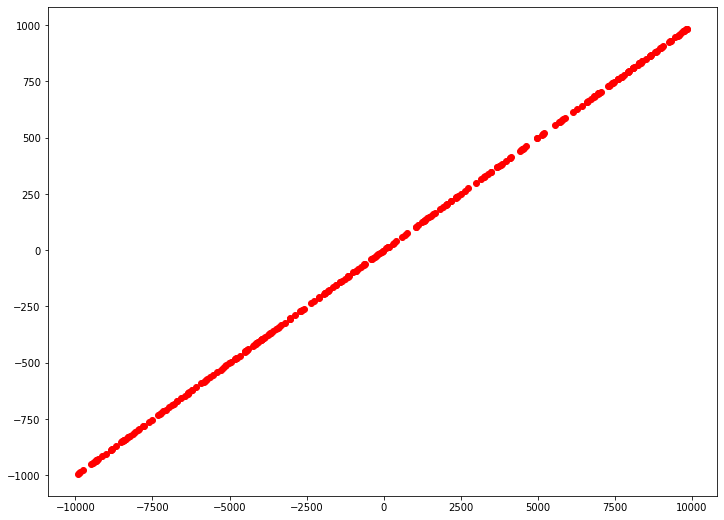

In [204]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = df
X = data['Y']
Y = data['X']
plt.scatter(X, Y, color = 'red')
plt.show()

Coding the Linear Regression as per above built understanding

In [205]:

# Building the model
m = 1
c = -1

L = 0.001  # The learning Rate
epochs = 10 # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*np.asarray(X) + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    print (m, c)

-62849.400980000006 -1.34702
4388957998.237764 24245.99135212398
-306493321488396.44 -1693235798.18398
2.140329348260967e+19 118243433580896.83
-1.4946523783229153e+24 -8.257272618644105e+18
1.043757930919126e+29 5.766286467989078e+23
-7.288856152485283e+33 -4.026760549947035e+28
5.090013923519499e+38 2.8120005165585397e+33
-3.5545003495217053e+43 -1.9636993079286696e+38
2.4822078926679635e+48 1.3713066371263837e+43


Visualizing the Model Fit

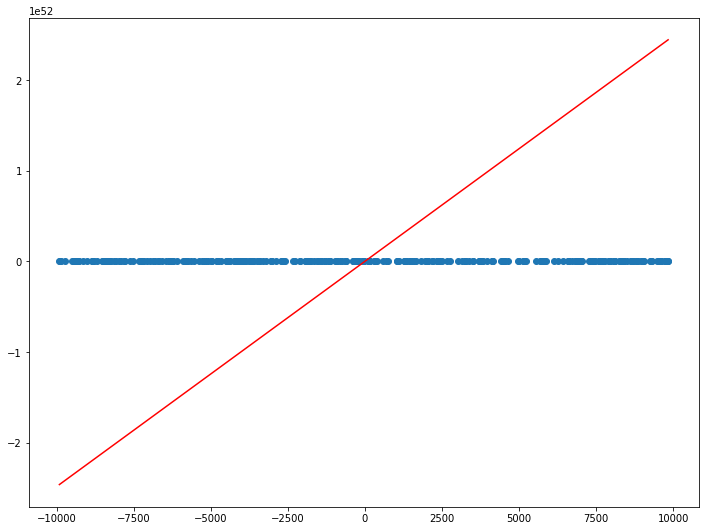

In [206]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

Making a Prediction on User Input Sample

In [207]:
def prediction(x):
    return (m*x)+c

inp = float(input("Please Enter Value of X: "))
prediction(inp)

Please Enter Value of X: 250


6.205519868800572e+50